# Keras CNN Classification

This data set is made available by Joost Hazelzet (https://www.kaggle.com/joosthazelzet/lego-brick-images). It contains rendered images of 16 different types of Lego bricks. Image classification task: predict the category of the brick in the validation set. 

In [1]:
#from __future__ import print_function
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import os

# Image Readers

In [36]:
#Image Data Generator manipulates and "augments" images

# Read Train Images
train_datagen = ImageDataGenerator(rescale=1/255)

#resize images to 96x96 pixels
train_data = DirectoryIterator(
    directory="LEGO/train",
    image_data_generator = train_datagen,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

# Read Validate Images
valid_datagen = ImageDataGenerator(rescale=1/255)

valid_data = DirectoryIterator(
    directory="LEGO/valid",
    image_data_generator = valid_datagen,
    target_size=(96, 96),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=True,
    seed=42)

Found 6379 images belonging to 16 classes.
Found 1555 images belonging to 16 classes.


# Classification Model

In [37]:
model = Sequential()

# input layer
model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(96,96,3)))

# pooling and dropout layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

#convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# pooling and dropout layers
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# flatten  
model.add(Flatten())

# dense and dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))

# softmax activation for 16 classes
model.add(Dense(16, activation='softmax'))

model.summary()

# RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(lr=0.01)

# train the model using RMSprop optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 96, 96, 16)        448       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 16928)           

In [64]:
# Fit Model
history = model.fit(
            train_data,
            steps_per_epoch=100,
            epochs=6,
            validation_data=valid_data,
            validation_steps=60
            )

Epoch 1/6
100/100 [==============================] - 12s 120ms/step - loss: 0.4988 - accuracy: 0.8418 - val_loss: 0.1414 - val_accuracy: 0.9434
Epoch 2/6
100/100 [==============================] - 11s 109ms/step - loss: 0.6042 - accuracy: 0.8103
Epoch 3/6
100/100 [==============================] - 11s 109ms/step - loss: 0.5785 - accuracy: 0.8359
Epoch 4/6
100/100 [==============================] - 12s 117ms/step - loss: 0.5914 - accuracy: 0.8319
Epoch 5/6
100/100 [==============================] - 12s 117ms/step - loss: 0.6001 - accuracy: 0.8506
Epoch 6/6
100/100 [==============================] - 12s 118ms/step - loss: 0.5942 - accuracy: 0.8422


In [65]:
print(history.history['val_loss'],
history.history['val_accuracy'])

[0.1414325088262558] [0.9434083700180054]


**The model achieves a validation accuracy of 94.3%**

### Test the model on a validation image

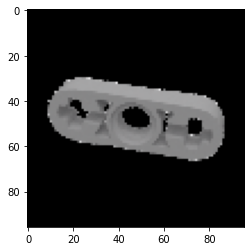

In [66]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from matplotlib import pyplot as plt

#Load a technic lever image from the validation folder
img = load_img("LEGO/valid/6632 Technic Lever 3M/201706171606-0051.png",
               color_mode='rgb',
               target_size=(96,96)
              )


plt.imshow(img)

In [67]:
# convert the image to an array
single_image = img_to_array(img)

# normalize the image by dividing by 255
img_rank4 = np.expand_dims(single_image/255, axis=0)

# pass the image through the model
model.predict(img_rank4)

array([[1.9117724e-04, 5.1151117e-04, 5.4323526e-05, 1.7991384e-05,
        1.0672984e-06, 4.0929543e-15, 5.7599938e-04, 3.3993399e-07,
        2.8058449e-09, 2.1812156e-07, 1.1798958e-07, 4.3334303e-08,
        2.0723501e-11, 9.6659652e-16, 9.3896739e-07, 9.9864632e-01]],
      dtype=float32)

In [68]:
# round the values in the prediction array
np.round(model.predict(img_rank4),2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]],
      dtype=float32)

In [69]:
# predict the class
np.argmax(model.predict(img_rank4), axis=-1)

array([15], dtype=int64)

The model predicts the class at index 15

In [70]:
# retrieve the class labels from train_generator
label_map = (train_data.class_indices)
label_map

{'11214 Bush 3M friction with Cross axle': 0,
 '18651 Cross Axle 2M with Snap friction': 1,
 '2357 Brick corner 1x2x2': 2,
 '3003 Brick 2x2': 3,
 '3004 Brick 1x2': 4,
 '3005 Brick 1x1': 5,
 '3022 Plate 2x2': 6,
 '3023 Plate 1x2': 7,
 '3024 Plate 1x1': 8,
 '3040 Roof Tile 1x2x45deg': 9,
 '3069 Flat Tile 1x2': 10,
 '32123 half Bush': 11,
 '3673 Peg 2M': 12,
 '3713 Bush for Cross Axle': 13,
 '3794 Plate 1X2 with 1 Knob': 14,
 '6632 Technic Lever 3M': 15}

In [71]:
# retrieve the class label of the prediction:
list(label_map.keys())[model.predict_classes(img_rank4)[0]]

'6632 Technic Lever 3M'

**The model correctly predicted the image as a "6632 Technic Lever 3M"**